In [1]:
# # Import Libraries

In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchsummary import summary
from torch.autograd import Variable

from torchvision import datasets, transforms
import torchvision

import sys, os
import matplotlib.pyplot as plt

import custom_resnet
from utils import CIFAR10Dataset, CIFAR10DataModule, learning_lr_finder,save_mis_images
from plots import plot_losses,plot_images 

from pytorch_grad_cam import GradCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from PIL import Image
import numpy as np

from utils import display_mis_images 
from utils import get_misclassified_data

from lightning.pytorch.loggers import TensorBoardLogger
from lightning.pytorch import seed_everything

import warnings
warnings.filterwarnings('ignore')
os.system("mkdir images")

/usr/local/lib/python3.8/dist-packages/torch_lr_finder/lr_finder.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


NOTE! Installing ujson may make loading annotations faster.


mkdir: cannot create directory ‘images’: File exists


256

In [3]:
### this is for running in local ###
import os
try:
    os.environ['HTTP_PROXY']='http://185.46.212.90:80'
    os.environ['HTTPS_PROXY']='http://185.46.212.90:80'
    print ("proxy_exported")
except:
    None
# # Model Params, optimizer, loss criterion and model summary
# Can't emphasize on how important viewing Model Summary is.
# Unfortunately, there is no in-built model visualizer, so we have to take external help

proxy_exported


In [4]:
import pytorch_lightning as pl

# Initialize DataModule and Model
data_module = CIFAR10DataModule()
data_module.setup('fit')

Files already downloaded and verified
Files already downloaded and verified


In [5]:
print (len(data_module.train_loader()))
print (len(data_module.val_loader()))

98
20


In [6]:
seed_everything(42, workers=True)

m = custom_resnet.ResNetLightningModel()

Global seed set to 42


Files already downloaded and verified
Files already downloaded and verified


In [7]:
trainer = pl.Trainer(max_epochs=m.EPOCHS,precision=32, accelerator="gpu", devices=1)
# Then you can train
trainer.fit(m,data_module.train_loader(), data_module.val_loader())

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]

  | Name       | Type       | Params
------------------------------------------
0 | convblock1 | Sequential | 1.9 K 
1 | convblock2 | Sequential | 74.1 K
2 | resnet1    | Sequential | 295 K 
3 | convblock3 | Sequential | 295 K 
4 | convblock4 | Sequential | 1.2 M 
5 | resnet2    | Sequential | 4.7 M 
6 | maxpool2   | MaxPool2d  | 0     
7 | fc_layer   | Linear     | 5.1 K 
------------------------------------------
6.6 M     Trainable params
0         Non-trainable params
6.6 M     Total params
26.301    Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]


Epoch: 0  Validation Acc Epoch Mean: 0.08984375


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


Epoch: 0  Validation Acc Epoch Mean: 0.39508846402168274

Epoch: 0  Training Acc Epoch Mean: 0.34424731135368347
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 1  Validation Acc Epoch Mean: 0.5509822964668274

Epoch: 1  Training Acc Epoch Mean: 0.49084460735321045
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 2  Validation Acc Epoch Mean: 0.6545553803443909

Epoch: 2  Training Acc Epoch Mean: 0.5999661684036255
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 3  Validation Acc Epoch Mean: 0.6249253153800964

Epoch: 3  Training Acc Epoch Mean: 0.6624006628990173
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 4  Validation Acc Epoch Mean: 0.7075138092041016

Epoch: 4  Training Acc Epoch Mean: 0.6919909119606018
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 5  Validation Acc Epoch Mean: 0.7573931813240051

Epoch: 5  Training Acc Epoch Mean: 0.7152318954467773
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 6  Validation Acc Epoch Mean: 0.7676872611045837

Epoch: 6  Training Acc Epoch Mean: 0.7401764392852783
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 7  Validation Acc Epoch Mean: 0.7785271406173706

Epoch: 7  Training Acc Epoch Mean: 0.7660453915596008
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 8  Validation Acc Epoch Mean: 0.7752413153648376

Epoch: 8  Training Acc Epoch Mean: 0.7775126695632935
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 9  Validation Acc Epoch Mean: 0.8269416689872742

Epoch: 9  Training Acc Epoch Mean: 0.7891573905944824
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 10  Validation Acc Epoch Mean: 0.839958667755127

Epoch: 10  Training Acc Epoch Mean: 0.7969071865081787
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 11  Validation Acc Epoch Mean: 0.831916332244873

Epoch: 11  Training Acc Epoch Mean: 0.8104804754257202
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 12  Validation Acc Epoch Mean: 0.8552045226097107

Epoch: 12  Training Acc Epoch Mean: 0.821078360080719
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 13  Validation Acc Epoch Mean: 0.8548828363418579

Epoch: 13  Training Acc Epoch Mean: 0.8263834714889526
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 14  Validation Acc Epoch Mean: 0.8610064387321472

Epoch: 14  Training Acc Epoch Mean: 0.8354154825210571
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 15  Validation Acc Epoch Mean: 0.8632755279541016

Epoch: 15  Training Acc Epoch Mean: 0.8456917405128479
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 16  Validation Acc Epoch Mean: 0.8694910407066345

Epoch: 16  Training Acc Epoch Mean: 0.8488587141036987
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 17  Validation Acc Epoch Mean: 0.8691980242729187

Epoch: 17  Training Acc Epoch Mean: 0.8566513061523438
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 18  Validation Acc Epoch Mean: 0.8872701525688171

Epoch: 18  Training Acc Epoch Mean: 0.8635203838348389
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 19  Validation Acc Epoch Mean: 0.8891429305076599

Epoch: 19  Training Acc Epoch Mean: 0.8699549436569214
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 20  Validation Acc Epoch Mean: 0.8936063647270203

Epoch: 20  Training Acc Epoch Mean: 0.8776307106018066
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 21  Validation Acc Epoch Mean: 0.8968290686607361

Epoch: 21  Training Acc Epoch Mean: 0.8844305872917175
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 22  Validation Acc Epoch Mean: 0.904377281665802

Epoch: 22  Training Acc Epoch Mean: 0.8905984163284302
**************************************************


Validation: 0it [00:00, ?it/s]


Epoch: 23  Validation Acc Epoch Mean: 0.9051815271377563

Epoch: 23  Training Acc Epoch Mean: 0.8941165208816528
**************************************************


`Trainer.fit` stopped: `max_epochs=24` reached.


In [8]:
print(trainer.callback_metrics)

{'train_loss': tensor(1.5692), 'train_loss_step': tensor(1.5575), 'train_acc': tensor(0.8941), 'train_acc_step': tensor(0.8988), 'lr': tensor(4.1716e-05), 'lr_step': tensor(1.5900e-07), 'val_acc_epoch_mean': tensor(0.9052), 'train_loss_epoch': tensor(1.5692), 'train_acc_epoch': tensor(0.8941), 'lr_epoch': tensor(4.1716e-05), 'training_acc_epoch_mean': tensor(0.8941)}


In [9]:
# Saving the model
trainer.save_checkpoint("model_checkpoint.pt")

# Loading the model
m = custom_resnet.ResNetLightningModel.load_from_checkpoint("model_checkpoint.pt")

Files already downloaded and verified
Files already downloaded and verified


In [10]:
cuda = torch.cuda.is_available()
device = torch.device("cpu" if cuda else "cpu")
print(device)

cpu


In [11]:
classes = ('plane', 'car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')


# ## Displaying Sample Miss Classified Images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

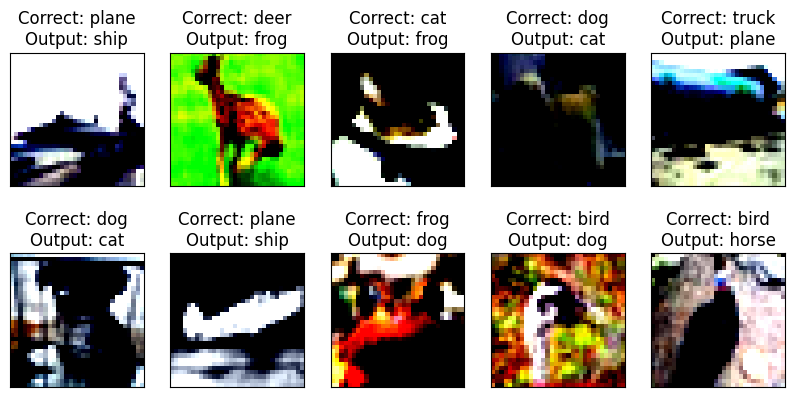

In [12]:
# Get the misclassified data from test dataset
misclassified_data = get_misclassified_data(m, device, data_module.val_loader())
miss_classified_images = display_mis_images(misclassified_data,10, classes)
miss_classified_images.savefig("images/miss_class.jpg")
#misclassified_data.savefig("images/miss_class.jpg")


# ## Displaying Sample Train Dataset after trasformation

In [14]:
save_mis_images(misclassified_data,30,classes,'misclassified_images')

mkdir: cannot create directory ‘misclassified_images’: File exists
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow wit

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

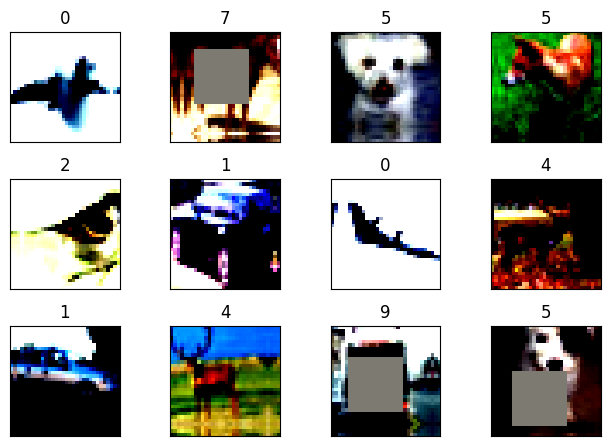

In [15]:
batch_data_train, batch_label_train = next(iter(data_module.train_loader()))
figure_train = plot_images(batch_data_train, batch_label_train.tolist(), 12, 3, 'CIFAR10')
figure_train.savefig("images/train_dataset.jpg")


# ## Displaying Sample Test Dataset

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

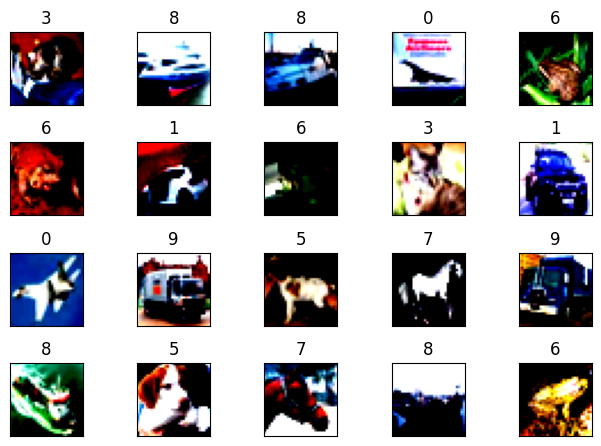

In [16]:
batch_data_test, batch_label_test = next(iter(data_module.val_loader()))
figure_test = plot_images(batch_data_test, batch_label_test.tolist(), 20, 4, 'CIFAR10')
figure_test.savefig("images/test_dataset.jpg")


# ## Grad Cam Images

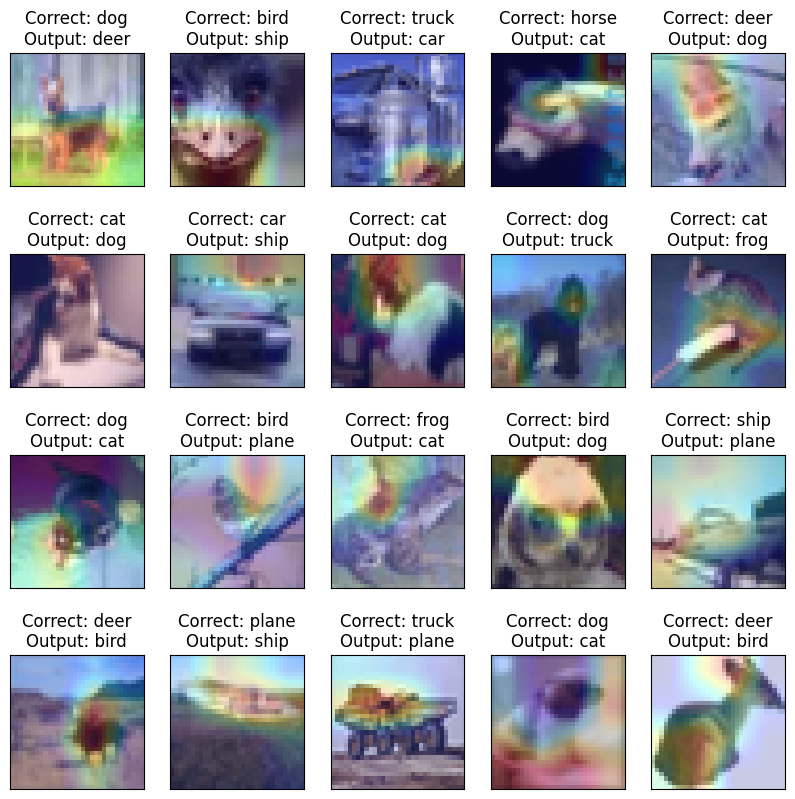

In [17]:
from utils import display_gradcam_output

# Denormalize the data using test mean and std deviation
inv_normalize = transforms.Normalize(
    mean=[-0.50/0.23, -0.50/0.23, -0.50/0.23],
    std=[1/0.23, 1/0.23, 1/0.23]
)

target_layers = [m.resnet2[-1]]
targets = None

figure_grad = display_gradcam_output(misclassified_data, classes, inv_normalize, m, target_layers, targets, number_of_samples=20, transparency=0.80)
figure_grad.savefig("images/grad.jpg")